 **Prediction Using Unsupervised Machine Learning(ML)**

**Importing All Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from  sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Iris.csv') 

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

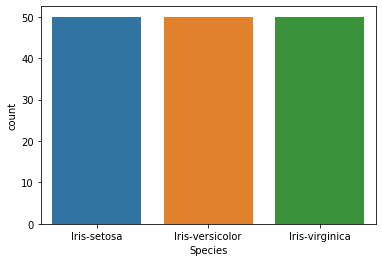

In [6]:
sns.countplot(df['Species'])

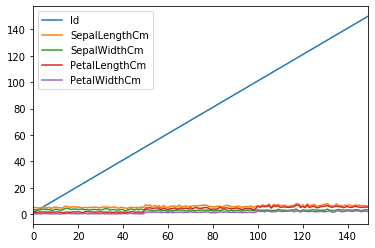

In [7]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df.plot()

In [8]:
from sklearn import datasets

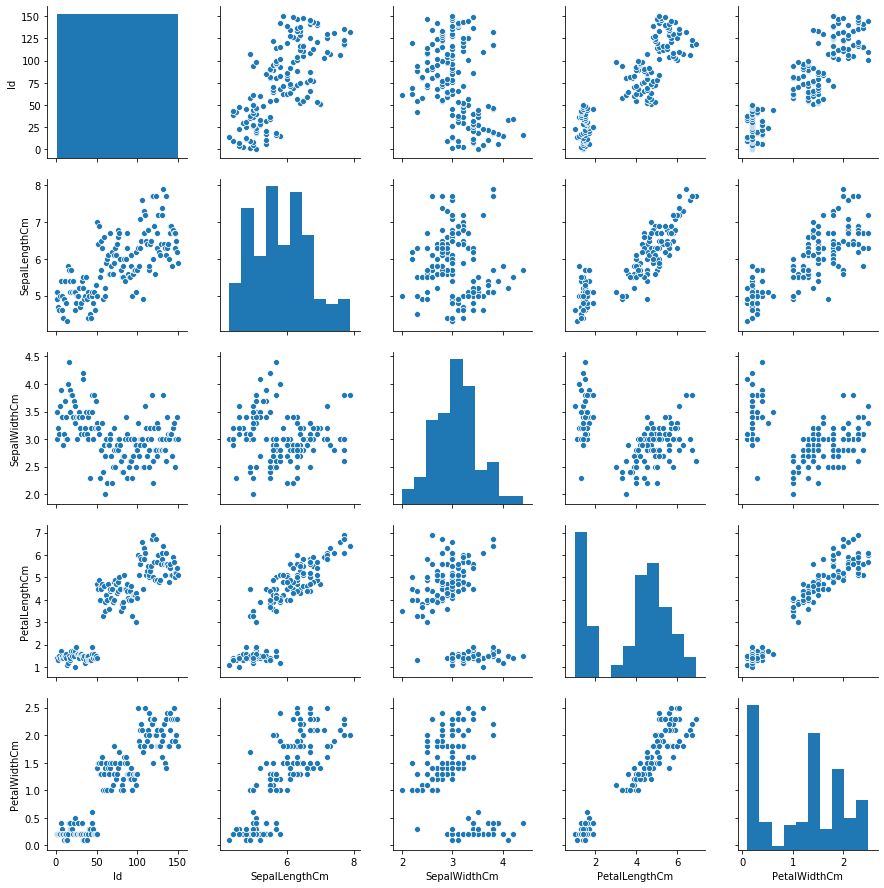

In [9]:
sns.pairplot(df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

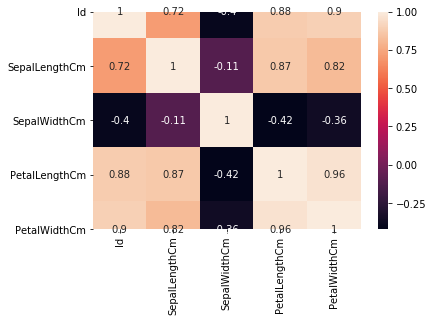

In [10]:
sns.heatmap(df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr(),annot=True)

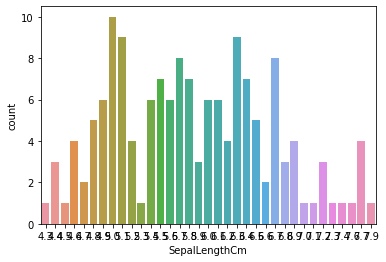

In [11]:
sns.countplot(df['SepalLengthCm'])

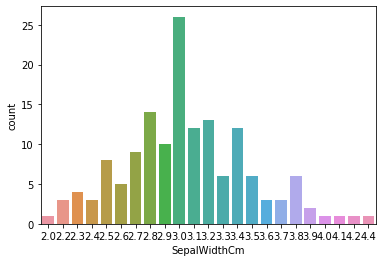

In [12]:
sns.countplot(df['SepalWidthCm'])

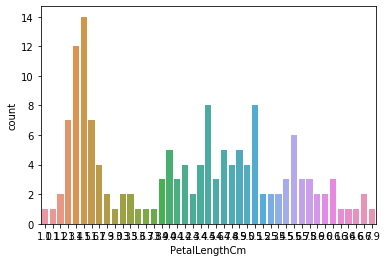

In [13]:
sns.countplot(df['PetalLengthCm'])

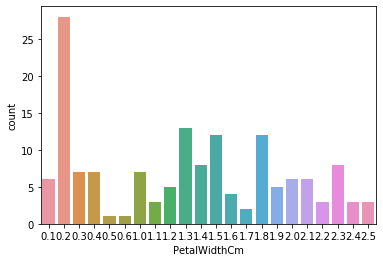

In [14]:
sns.countplot(df['PetalWidthCm'])

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


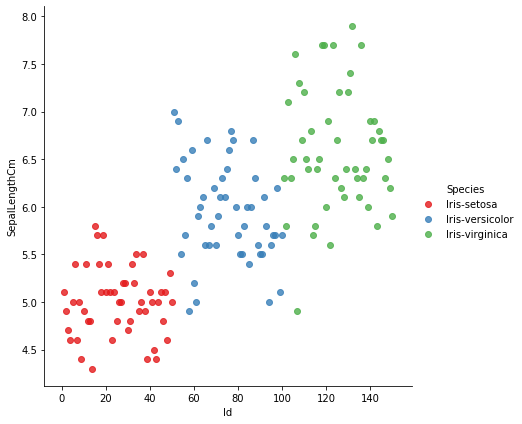

In [17]:
sns.lmplot('Id','SepalLengthCm',data=df, hue='Species',palette='Set1',height=6,aspect=1,fit_reg=False)

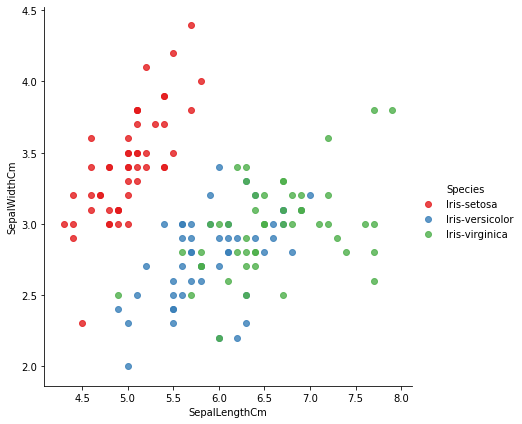

In [18]:
sns.lmplot('SepalLengthCm','SepalWidthCm',data=df, hue='Species',palette='Set1',height=6,aspect=1,fit_reg=False)

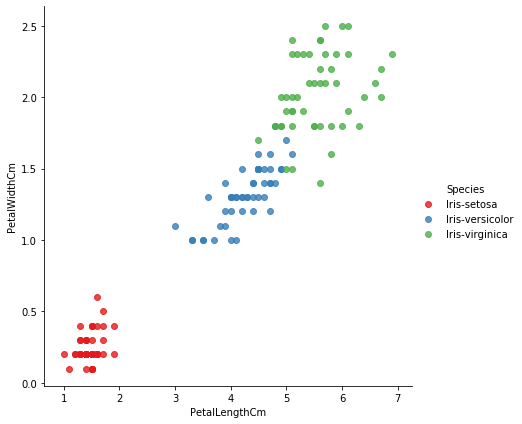

In [19]:
sns.lmplot('PetalLengthCm','PetalWidthCm',data=df, hue='Species',palette='Set1',height=6,aspect=1,fit_reg=False)

In [20]:
kmeans = KMeans(n_clusters=3)

In [21]:
kmeans.fit(df.drop('Species',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
df['klabels'] = kmeans.labels_
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,klabels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [23]:
centers = kmeans.cluster_centers_
centers

array([[125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

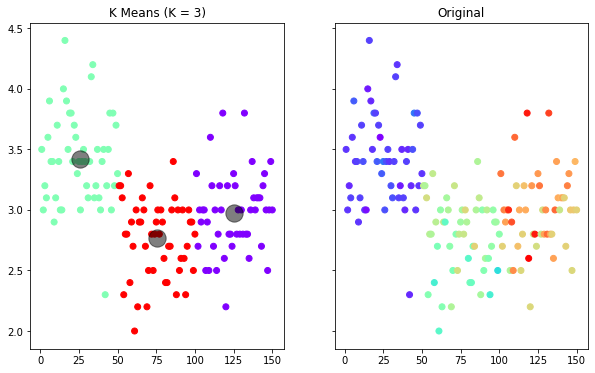

In [24]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

ax1.set_title('K Means (K = 3)')
ax1.scatter(x = df['Id'], y = df['SepalWidthCm'], 
            c = df['klabels'], cmap='rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:,2],
            c='black',s=300, alpha=0.5);
 
ax2.set_title("Original")
ax2.scatter(x = df['Id'], y = df['SepalWidthCm'], 
            c = df['PetalLengthCm'], cmap='rainbow')

In [25]:
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df.drop('Species',axis=1))

In [26]:
sum_square = {}
sum_square[k] = kmeans.inertia_ 

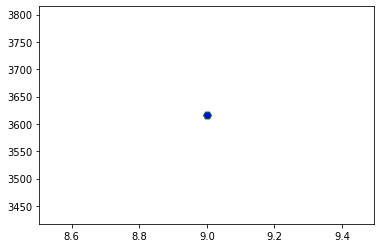

In [27]:
plt.plot(list(sum_square.keys()), list(sum_square.values()),
         linestyle ='-', marker = 'H', color = 'g',
         markersize = 8,markerfacecolor = 'b')

In [28]:
kmeans = KMeans(n_clusters=3)


/home/ankit/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


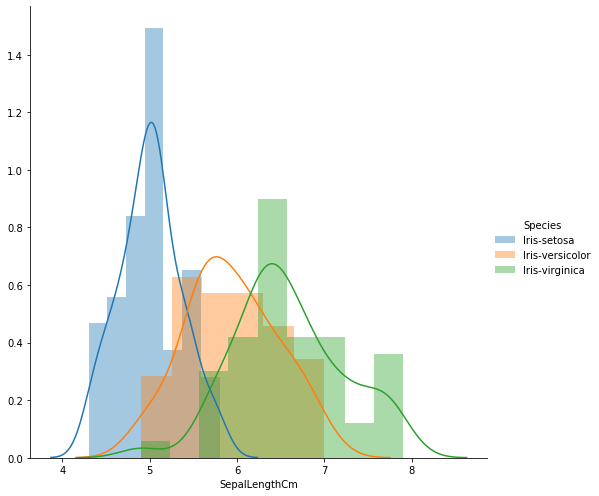

In [29]:
sns.FacetGrid(df,hue='Species',size=7).map(sns.distplot,'SepalLengthCm').add_legend()

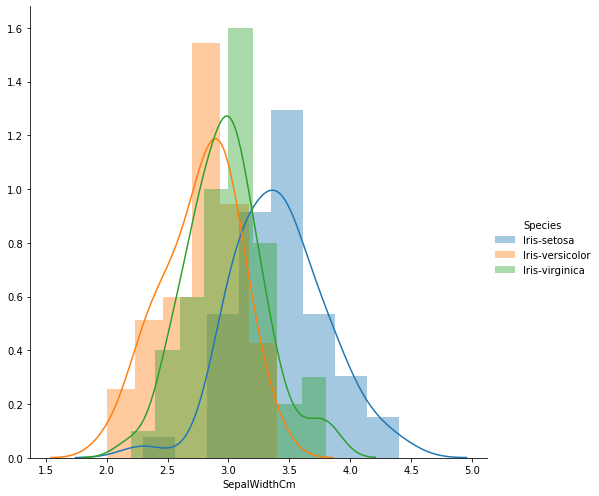

In [30]:
sns.FacetGrid(df,hue='Species',size=7).map(sns.distplot,'SepalWidthCm').add_legend()

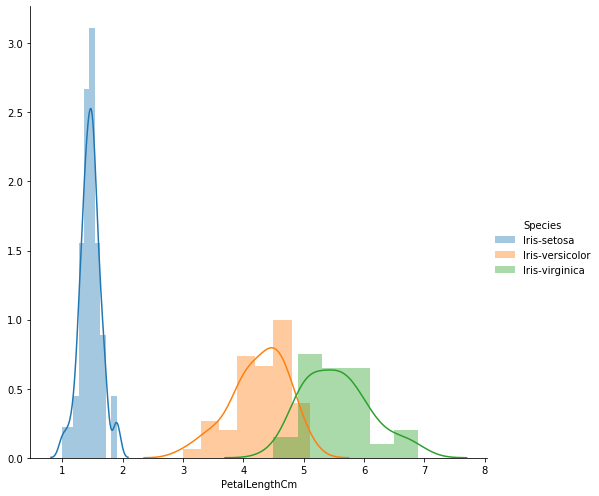

In [31]:
sns.FacetGrid(df,hue='Species',size=7).map(sns.distplot,'PetalLengthCm').add_legend()

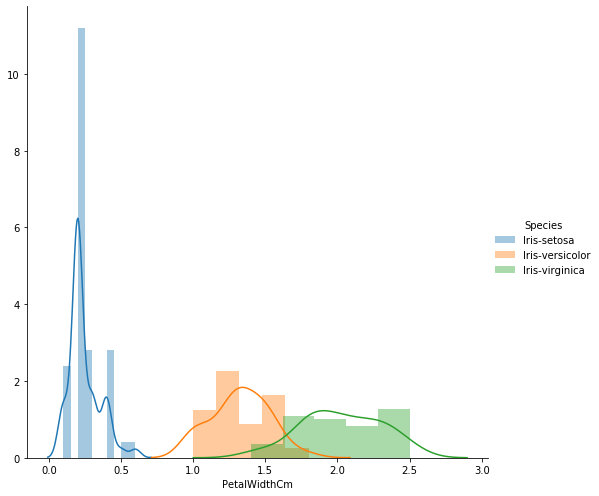

In [32]:
sns.FacetGrid(df,hue='Species',size=7).map(sns.distplot,'PetalWidthCm').add_legend()

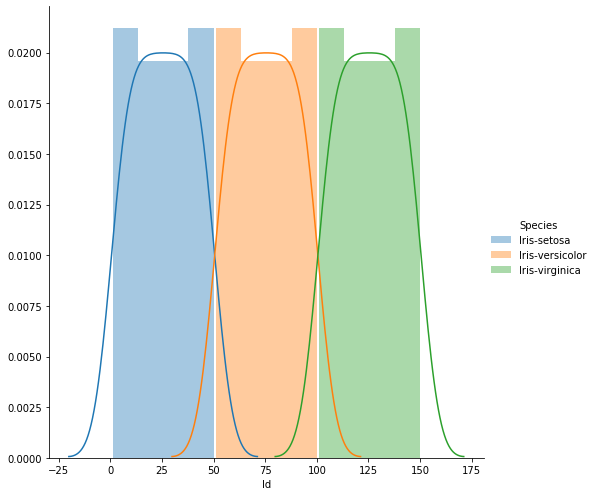

In [33]:
sns.FacetGrid(df,hue='Species',size=7).map(sns.distplot,'Id').add_legend()

/home/ankit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ankit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


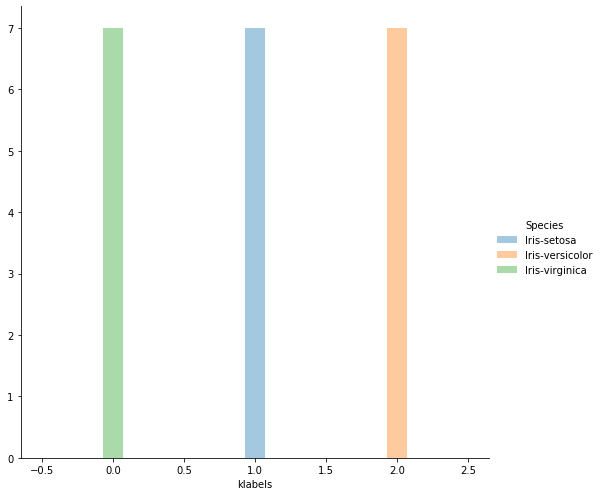

In [34]:
sns.FacetGrid(df,hue='Species',size=7).map(sns.distplot,'klabels').add_legend()

In [35]:
print("MEAN , MEDIAN , STANDARD DEVIATION")

MEAN , MEDIAN , STANDARD DEVIATION


In [36]:
df_setosa = df.loc[df['Species']=='Iris-setosa']

In [37]:
print(np.mean(df_setosa['PetalLengthCm']))

1.464


In [38]:
print(np.mean(df_setosa['PetalWidthCm']))

0.2439999999999999


In [39]:
print(np.mean(df_setosa['SepalLengthCm']))

5.005999999999999


In [40]:
print(np.mean(df_setosa['SepalWidthCm']))

3.4180000000000006


In [43]:
print(np.mean(df_versicolor['PetalWidthCm']))

1.3259999999999998


In [44]:
df_versicolor = df.loc[df['Species']=='Iris-versicolor']

In [45]:
print(np.mean(df_versicolor['PetalLengthCm']))

4.26


In [46]:
print(np.mean(df_versicolor['SepalWidthCm']))

2.7700000000000005


In [47]:
print(np.mean(df_versicolor['SepalLengthCm']))

5.936


In [48]:
print(np.mean(df_versicolor['Id']))

75.5


In [49]:
df_virginica = df.loc[df['Species']== 'Iris-virginica']

In [50]:
print(np.mean(df_virginica['SepalWidthCm']))

2.9739999999999998


In [51]:
print(np.mean(df_virginica['SepalLengthCm']))

6.587999999999998


In [52]:
print(np.mean(df_virginica['PetalWidthCm']))

2.026


In [53]:
print(np.mean(df_virginica['PetalLengthCm']))

5.552


In [54]:
print(np.mean(df_virginica['Id']))

125.5


In [55]:
print(np.std(df_setosa['PetalLengthCm']))

0.17176728442867115


In [56]:
print(np.std(df_setosa['PetalWidthCm']))

0.10613199329137278


In [57]:
print(np.std(df_setosa['SepalLengthCm']))

0.348946987377739


In [58]:
print(np.std(df_setosa['SepalWidthCm']))

0.37719490982779713


In [59]:
print(np.std(df_setosa['Id']))

14.430869689661812


In [60]:
print(np.std(df_versicolor['Id']))

14.430869689661812


In [61]:
print(np.std(df_versicolor['SepalLengthCm']))

0.5109833656783752


In [62]:
print(np.std(df_versicolor['SepalWidthCm']))

0.31064449134018135


In [63]:
print(np.std(df_versicolor['PetalLengthCm']))

0.4651881339845204


In [64]:
print(np.std(df_versicolor['PetalWidthCm']))

0.19576516544063702


In [65]:
print(np.std(df_virginica['Id']))

14.430869689661812


In [66]:
print(np.std(df_virginica['SepalWidthCm']))

0.319255383666431


In [67]:
print(np.std(df_virginica['SepalLengthCm']))

0.6294886813914925


In [68]:
print(np.std(df_virginica['PetalLengthCm']))

0.5463478745268441


In [69]:
print(np.std(df_virginica['PetalWidthCm']))

0.2718896835115301


In [70]:
print(np.median(df_setosa['Id']))

25.5


In [71]:
print(np.median(df_setosa['PetalLengthCm']))

1.5


In [72]:
print(np.median(df_setosa['PetalWidthCm']))

0.2


In [73]:
print(np.median(df_setosa['SepalLengthCm']))

5.0


In [74]:
print(np.median(df_setosa['SepalWidthCm']))

3.4


In [75]:
print(np.median(df_versicolor['Id']))

75.5


In [76]:
print(np.median(df_versicolor['PetalLengthCm']))

4.35


In [77]:
print(np.median(df_versicolor['PetalWidthCm']))

1.3


In [78]:
print(np.median(df_versicolor['SepalLengthCm']))

5.9


In [79]:
print(np.median(df_versicolor['SepalWidthCm']))

2.8


In [80]:
print(np.median(df_virginica['Id']))

125.5


In [81]:
print(np.median(df_virginica['SepalLengthCm']))

6.5


In [82]:
print(np.median(df_virginica['SepalWidthCm']))

3.0


In [83]:
print(np.median(df_virginica['PetalLengthCm']))

5.55


In [84]:
print(np.median(df_virginica['PetalWidthCm']))

2.0


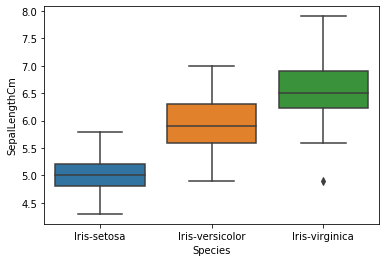

In [85]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df)

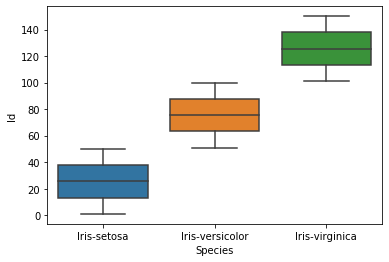

In [86]:
sns.boxplot(x='Species',y='Id',data=df)

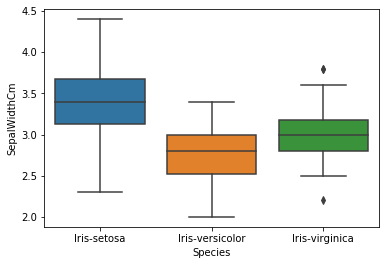

In [87]:
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

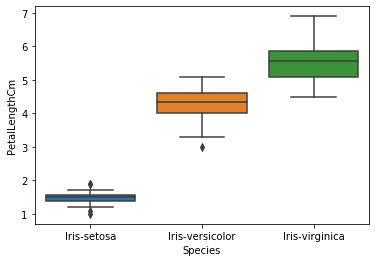

In [88]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

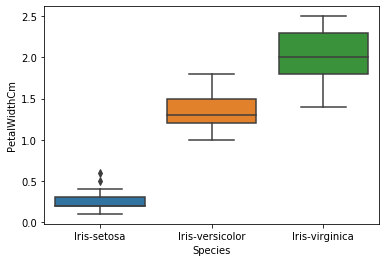

In [89]:
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

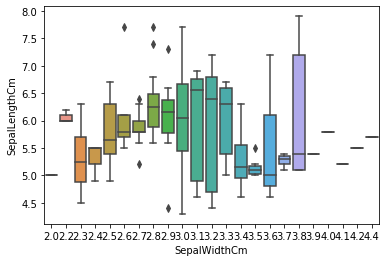

In [90]:
sns.boxplot(x='SepalWidthCm',y='SepalLengthCm',data=df)

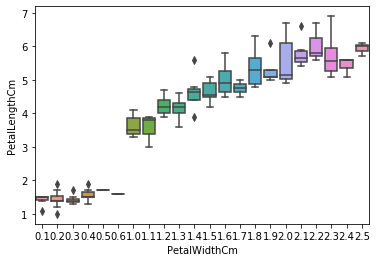

In [91]:
sns.boxplot(x='PetalWidthCm',y='PetalLengthCm',data=df)

/home/ankit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ankit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


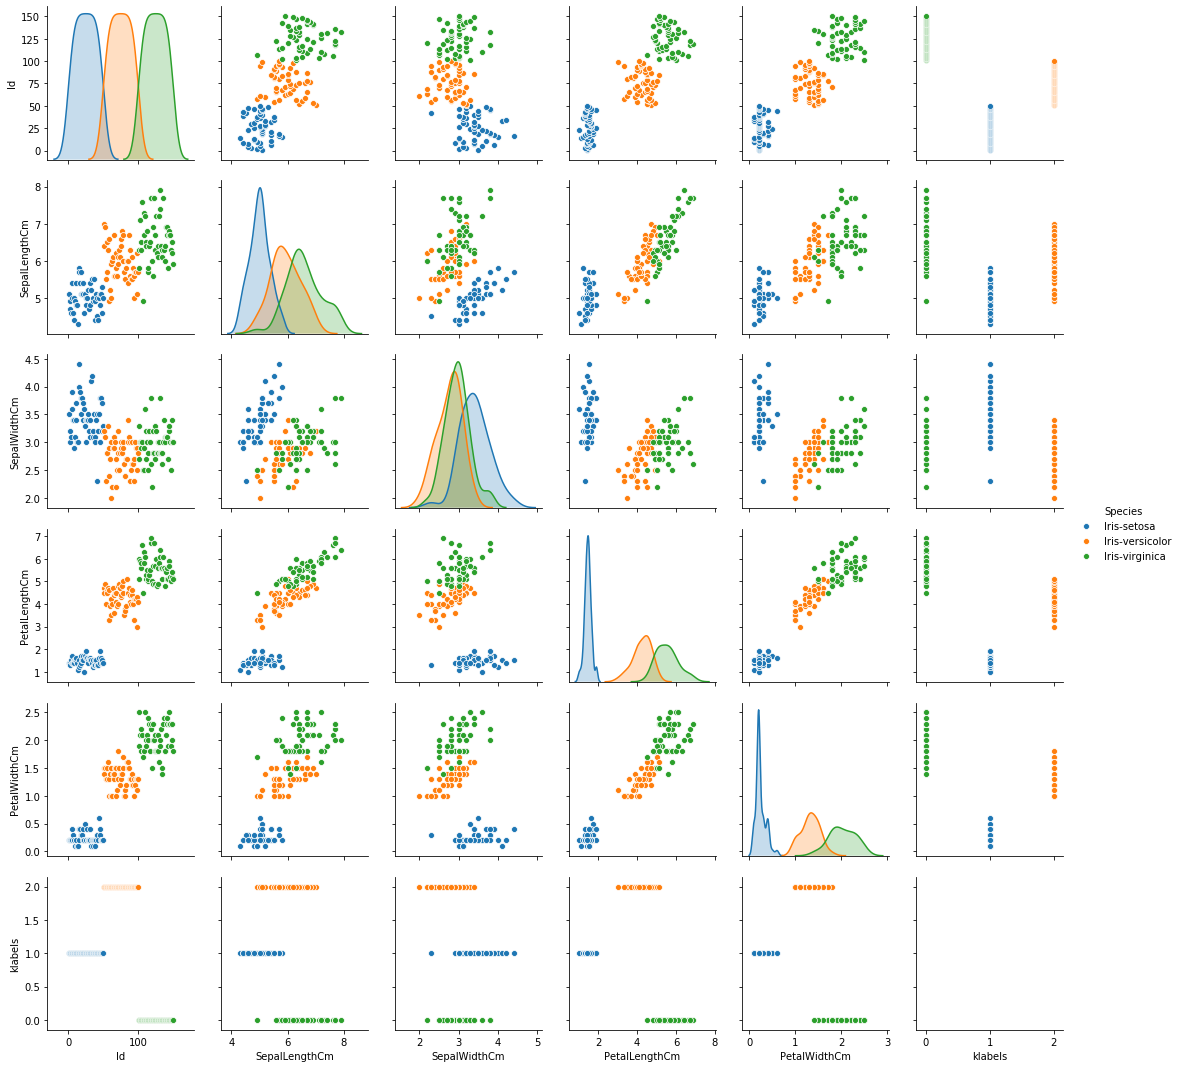

In [92]:
sns.pairplot(df,hue='Species')

In [93]:
print("---------------------------------------> THE END <-------------------------------------------------------")

---------------------------------------> THE END <-------------------------------------------------------
